# Meshing examples

### Imports and set domain

In [1]:
from MeshLib import MeshLib as ml

domain = [(0, 0), (1, 0), (1, 1), (0, 1)]

2023-12-04 05:20:03.627484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 05:20:04.321053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



my_types lib imported

MeshLib imported



### Base case

#### Generate simple mesh and simple refinement

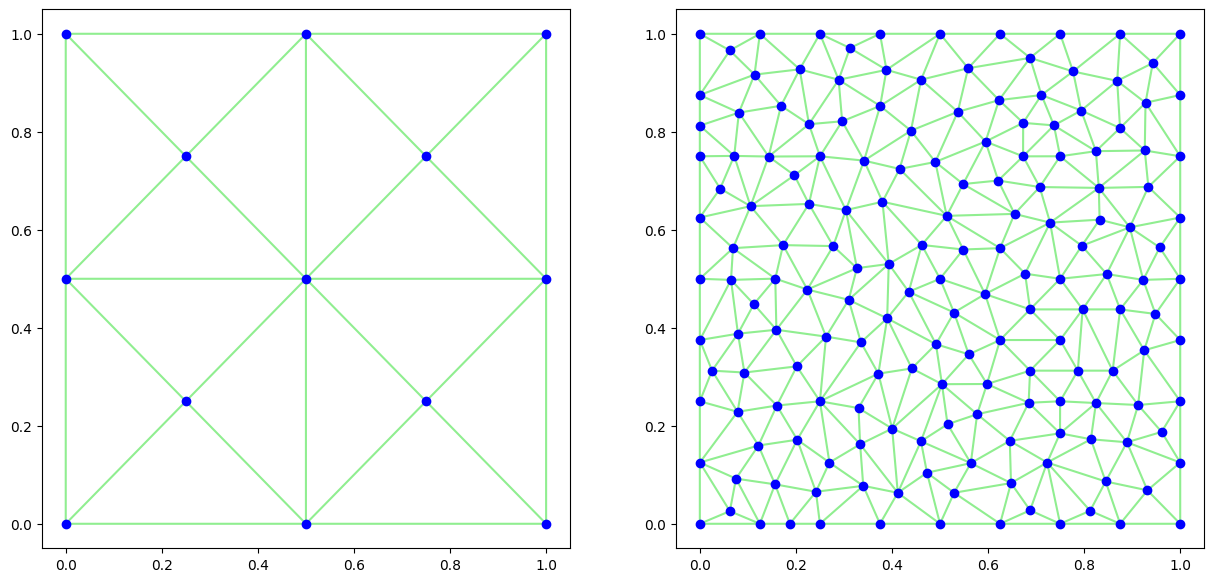

In [2]:
# generate_mesh can be used to initialise a mesh on a domain
mesh = ml.generate_mesh(domain, 0.1)

# refine_mesh can be used to initialise a mesh while preserving nodes of a previous mesh
refined_mesh = ml.refine_mesh(mesh, 0.005)

# compare is used to (obviously) compare meshes, can be presented side-by-side (below)
ml.compare(mesh, refined_mesh, side_by_side=True)

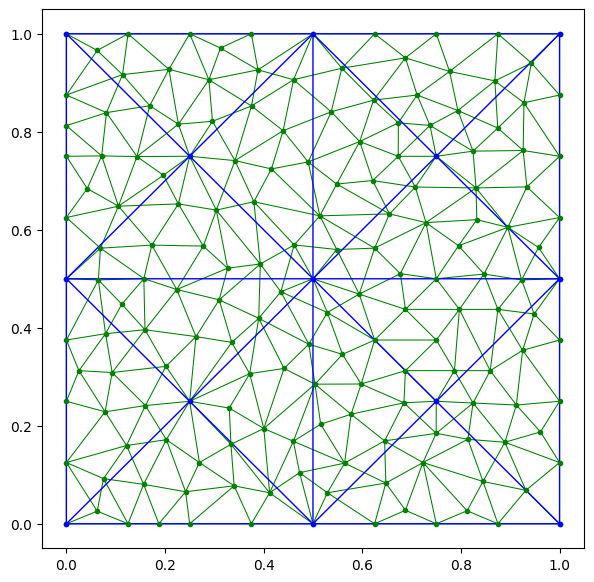

In [3]:
# compare can also be used to lay meshes over each other as shown below
ml.compare(mesh, refined_mesh, side_by_side=False)

# if you want the order of meshes to be switched in the plot, just swap the arguments

#### Check assignment of little triangles

/home/evan/IVPINN/mesh_lib/MeshLib.py:245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  btol = np.array(btol)


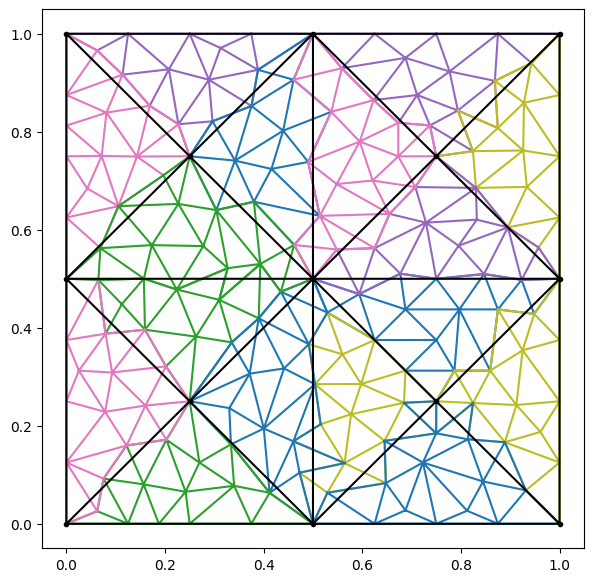

In [4]:
# Given two meshes, we can create a map in both directions 
ltob, btol = refined_mesh.assign_to_big_triangles(mesh, plot=True)

# ltob (little to big) will give the index of the big triangle,
# when given the index of a little triangle

# when plot is set to True in the function call, then we can see the assignment visually

In [5]:
# And then the maps are explained explicitly in this block

print(f"Map from little triangles to big triangles:")
print(f"1D list of size = (#little triangles)\n")
print(f"{ltob}\n")
print(f"\t Usage: ltob[ID of little triangle] = ID of its big triangle\n")
print()
print(f"Map from big triangles to little triangles:")
print(f"2D list of size = (#big triangles, #little triangles per big triangle)\n")
print(f"{btol}\n")
print(f"\t Usage: btol[ID of big triangle] = ID of all little triangles it contains")

Map from little triangles to big triangles:
1D list of size = (#little triangles)

[ 0  5 10  2  4  4  4 13  1 12 13  5 12 13  0  4 12  9  4  0  0  0  0  0
 12 12  0  0 12 12  9 13  9 12 13 13  0  9 12 13 12  9  4  0  4  4  5 15
  4  4  4  4  5  5  4  4 15 15  0  4  5  4  5 15  5  5 11  1  5  4  5  1
  1 14 11  8 15  1  5  5 15  4  4 15 15  4 15  5  5  5  6  5  5  6  8  6
  5  6  6  6  6  5  0 15  0 12  0  0 13 12 12 13 13 10 14 14  1  3  8  6
  1  5  0  0 15 14 14 14 14 14 14 12 12  9  9  9 10 13 12  9  9  7  7  7
  9 10 13 12 12  7  9 13 13  7 11 10  7  7 13  7 13  7  7  9  9  7  7 13
 13 10  2 10 13  2 13  2 10  2  2 10 10  2  2  3  2 11  2  3  2 10 10  3
 10 10  2  3  3  3 11  2  3  2  3  3  3  3  3 11  3 11 11  1  1 11 11  8
  8 11 11 11 11 11 10  3  3  1  1 11  8  8  1  8  8 11 11 10 13 11 11  1
  8  1  1  8  8  8  6  8  8  6  6  8  8  6  6  8  6 13 12 15 15 15 14 15
 15 14 14 14 14 14 15 14 15 14 14  0  7  7  7  9  7  7  7  9  9  7  9  3
  3  2  2  2  3  6  3  8  8  6  6  6  6 1

### Segmentation case

#### Generate simple mesh and refine in segments

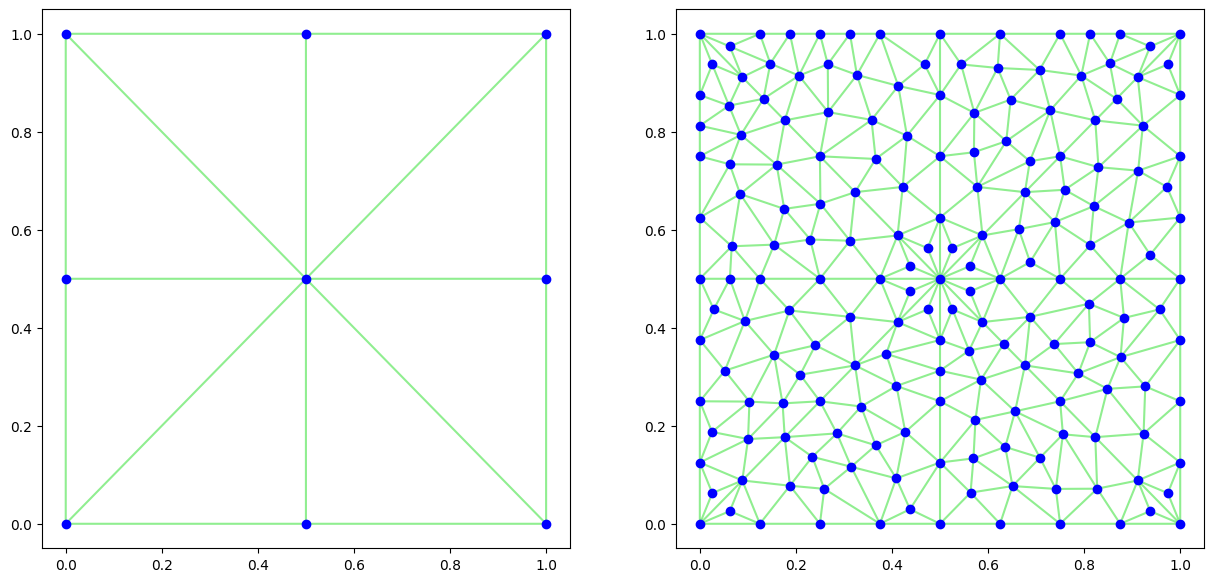

In [6]:
# The difference in this example is that the segmentation flag is set to True
# This means that the refinement will be done within each segment
mesh = ml.generate_mesh(domain, 0.2)
refined_mesh_seg = ml.refine_mesh(mesh, 0.005, segmentation=True)
ml.compare(mesh, refined_mesh_seg)

#### Check assignment of little triangles

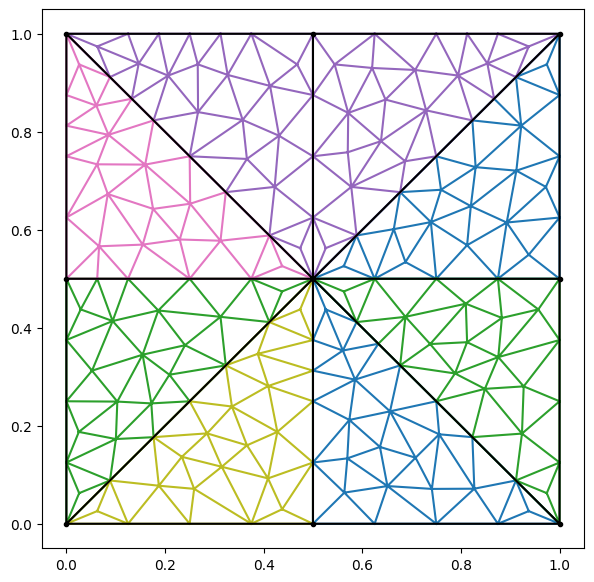

In [7]:
# As you can see, compared to the previous case, this means that the finer mesh sits
# well within the coarser mesh

ltob, btol = refined_mesh_seg.assign_to_big_triangles(mesh, plot=True)

### Regular mesh chain case

#### Generate chain

In [8]:
# This function creates a chain of meshes that are refined regularly via triangle splitting
# depth indicated the length of the chain
mesh_chain = ml.generate_regular_mesh_chain(domain, depth=9, plot=False)

#### Compare two meshes in the chain

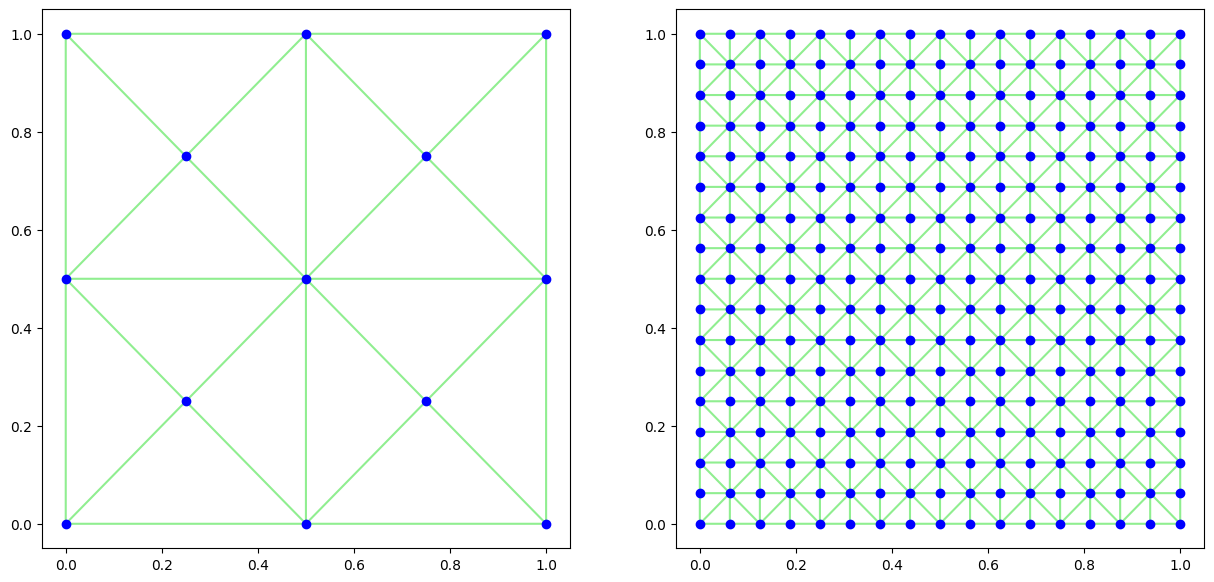

In [9]:
# Then we can see, meshes of the chain can be taken from the list as below and compared
ml.compare(mesh_chain[3], mesh_chain[8])

#### Check assignment between two meshes in the chain

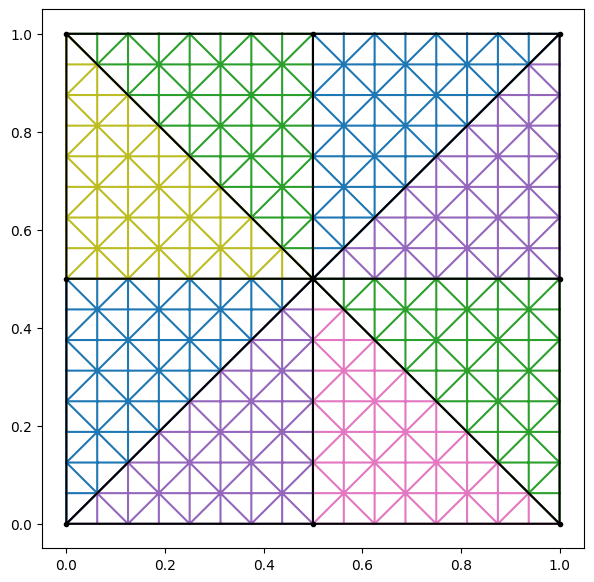

In [10]:
coarse_mesh = mesh_chain[2]
fine_mesh = mesh_chain[8]

# Also this chained refinement approach yields nice regular meshed that nest well

ltob, btol = fine_mesh.assign_to_big_triangles(coarse_mesh, plot=True)

## Other

In [11]:
# Simple mesh summary
coarse_mesh.summary()

Mesh summary:
 - #nodes: 9
 - #edges: 16
 - #triangles: 8
-------------------------
 - h_min: 0.5
 - h_max: 0.7071067811865476
 - h_avg: 0.5517766952966369
-------------------------


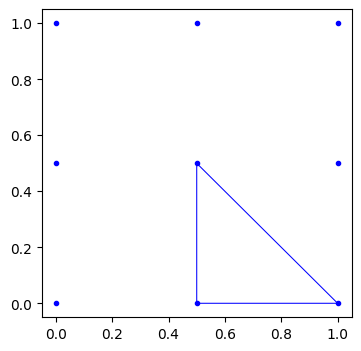

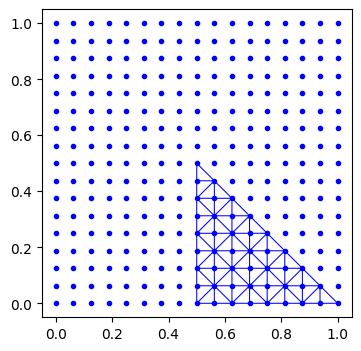

In [12]:
# These cells are just to show the use of the btol, ltob maps

# So here we see by specifying the big triangle number
# we can find all the little triangles it contains

id = 3
coarse_mesh.plot(triangles=[id])
fine_mesh.plot(triangles=btol[id])

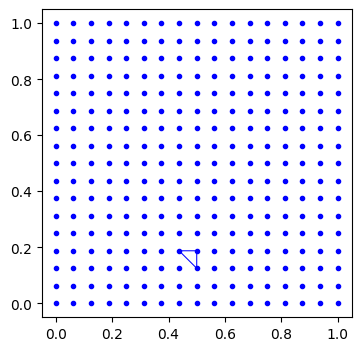

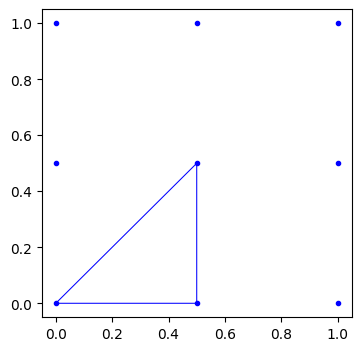

In [13]:
# Similarly in this example, we see that given a little triangle
# we can find the big triangle it is in

# Give random id of little triangle
id = 143

fine_mesh.plot(triangles=[id])
coarse_mesh.plot(triangles=[ltob[id]])

In [14]:
# Also just to show how the data of the mesh is accessed
coarse_mesh.vertices
coarse_mesh.edges
coarse_mesh.triangles
coarse_mesh.vertex_markers
coarse_mesh.edge_markers
# ...etc


array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]], dtype=int32)